# Урок 7. 

## Многомерный статистический анализ. Линейная регрессия

In [2]:
import numpy as np
import math

### Задача 1

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 


Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). 

Произвести расчет как с использованием intercept, так и без.

In [4]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

1. Вычислим коэффициенты линейной регрессии с учетом свободного члена (intercept)

In [5]:
k = (np.mean(zp * ks) - zp.mean() * ks.mean()) / (np.mean(zp**2) - zp.mean()**2)
print(k)

2.620538882402765


In [6]:
b = ks.mean() - k * zp.mean()
print(b)

444.1773573243596


Построим соответствующие графики

In [7]:
import matplotlib.pyplot as plt

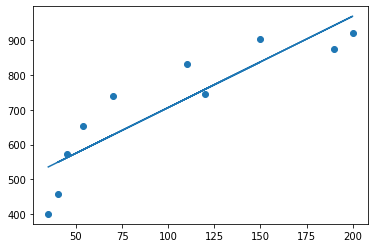

In [8]:
plt.scatter(zp, ks)
plt.plot(zp, k * zp + b)
plt.show()

2. Вычислим угловой коэффициент $k$ без учета свободного члена $b$. Воспользуемся матричной формулой, потому что она универсальная. Формулу, однако, упростим, потому что обращение матрицы здесь вырождается в обращение скаляра. 

Сначала сформируем векторы-столбцы $X$ и $Y$

In [9]:
x = zp.T

In [10]:
y = ks.T

Матричная формула для расчета вектора коэффициентов линейной регрессии $\beta$

$\beta = {(X^T X)}^{-1} X^T Y $

In [11]:
k = np.dot(1 / np.dot(x.T, x) * x.T, y) 
print(k)

5.889820420132689


### Задача 2

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

Найдем производныую функции $f = \frac{\sum{w_1*X - y}^2}{n}$ 

по $w_1$ : 

$f = \frac{1}{n} \sum{2*(w_1*X - y) * X}  =  \frac{2}{n} \sum{(w_1*X - y) * X}  $ 

Зададим скорость градиентного спуска:

In [12]:
alpha = 1e-7

Зададим произвольное значение веса, от которого начнем спуск:

In [13]:
w1 = 0.01

Зададим ограничение на количество шагов градиентного спуска:

In [14]:
itrs = 10000

Пропишем функцию и запустим градиентный спуск, в саму функцию запишу и расчет ошибки:

In [17]:
X = np.vstack((np.ones((1, 10)), zp))

In [18]:
def grad_dscn(alpha, w1, itrs, X, y):
    for i in range(itrs):
        y_pred = w1 * X
        w1 -= alpha * (2/len(X)) * np.sum((y_pred - y) * X)
        mse_ = np.sum((w1 * X - y)**2)/len(X)
        if i%1000 ==0:
            print('iteration: {i}, w1: {w1}, mse: {mse}'.format(i=i, w1=w1, mse=mse_))
    

In [19]:
grad_dscn(alpha, w1, itrs, X[1], ks)

iteration: 0, w1: 0.0262007868, mse: 530184.4046127194
iteration: 1000, w1: 5.518375906423665, mse: 58417.630063043674
iteration: 2000, w1: 5.866290410447163, mse: 56524.48598675374
iteration: 3000, w1: 5.888329857382757, mse: 56516.88902425671
iteration: 4000, w1: 5.889725996996393, mse: 56516.85853854784
iteration: 5000, w1: 5.889814438681274, mse: 56516.8584162123
iteration: 6000, w1: 5.889820041223851, mse: 56516.85841572138
iteration: 7000, w1: 5.889820396129836, mse: 56516.85841571943
iteration: 8000, w1: 5.889820418612173, mse: 56516.85841571941
iteration: 9000, w1: 5.88982042003637, mse: 56516.85841571943


In [20]:
w1 =  5.889796417355146
ks_pred = w1 * zp

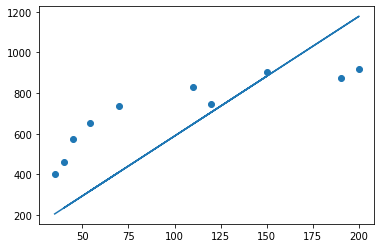

In [21]:
plt.scatter(zp, ks);
plt.plot(zp, ks_pred);

транспонирую матрицы

In [22]:
def mse(y, y_pred):
    err = np.sum((y - y_pred)**2) / len(y)
    return err

### Задача 3

В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента? *

Лапласса - если известно стандартное отклонение, если неизвестно - Стьюдента

### Задача 4

Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [23]:
def mse(x, y, k, b):
    return np.mean( (y - k * x - b) ** 2 )

def d_mse_dk(x, y, k, b):
    return np.mean( -2 * (y - k * x - b) * x )

def d_mse_db(x, y, k, b):
    return np.mean( -2 * (y - k * x - b) )

alpha_k = (10) ** (-7)
alpha_b = math.sqrt(alpha_k)
tol = (10) ** (-3)

k = 0.1
b = 10.2
counter = 0
while (1):
    delta_k = d_mse_dk(zp, ks, k, b) * alpha_k
    delta_b = d_mse_db(zp, ks, k, b) * alpha_b
    k -= delta_k
    b -= delta_b
    counter += 1
    if np.abs(delta_k) + np.abs(delta_b) < tol:
        break

print(k)
print(b)
print(counter)

2.6770475427257874
436.8786442038018
27646
